In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("D:\DOWNLOADS\dataset\dataset/Youth India Foundation E-School.csv",encoding='latin-1')
df.head()

,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my APL frie...
1,2,0,I missed the New Moon trail...
2,3,1,omg its already 7:30 :O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,i think mi bf is cheating on me!!! ...


In [3]:
df.shape

(99989, 3)

In [4]:
len(df["ItemID"].unique())

99989

We have all unique item id. so this feature is irrelavent for further processing.
we will remove it.

In [5]:
df.drop(columns="ItemID",inplace=True)

In [6]:
df

,Sentiment,SentimentText
0,0,is so sad for my APL frie...
1,0,I missed the New Moon trail...
2,1,omg its already 7:30 :O
3,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,0,i think mi bf is cheating on me!!! ...
...,...,...
99984,0,@Cupcake seems like a repeating problem hop...
99985,1,@cupcake__ arrrr we both replied to each other...
99986,0,@CuPcAkE_2120 ya i thought so
99987,1,@Cupcake_Dollie Yes. Yes. I'm glad you had mor...


In [7]:
df.isna().sum()

Sentiment        0
SentimentText    0
dtype: int64

In [8]:
df["Sentiment"].value_counts()

1    56457
0    43532
Name: Sentiment, dtype: int64

<AxesSubplot:xlabel='Sentiment', ylabel='count'>

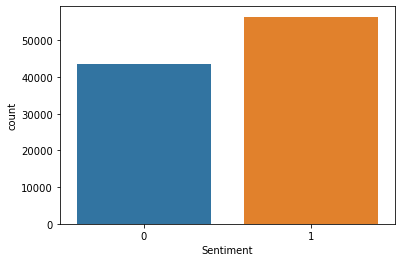

In [9]:
sns.countplot(x='Sentiment', data=df)

In [10]:
from wordcloud import WordCloud, STOPWORDS

In [11]:
df_pos = df.loc[df['Sentiment']==1,:]

In [12]:
df_pos

,Sentiment,SentimentText
2,1,omg its already 7:30 :O
6,1,Juuuuuuuuuuuuuuuuussssst Chillin!!
8,1,handed in my uniform today . i miss you ...
9,1,hmmmm.... i wonder how she my number @-)
11,1,thanks to all the haters up in my face a...
...,...,...
99980,1,@cunningstunts22 afternoon jim hows you x
99982,1,@Cup_Of_Katy Have fun doing health &amp; safet...
99985,1,@cupcake__ arrrr we both replied to each other...
99987,1,@Cupcake_Dollie Yes. Yes. I'm glad you had mor...


In [13]:
words = ' '.join(df_pos['SentimentText'])
print(words[:4000])

              omg its already 7:30 :O        Juuuuuuuuuuuuuuuuussssst Chillin!!       handed in my uniform today . i miss you already       hmmmm.... i wonder how she my number @-)       thanks to all the haters up in my face all day! 112-102     Feeling strangely fine. Now I'm gonna go listen to some Semisonic to celebrate     You're the only one who can see this cause no one else is following me this is for you because you're pretty awesome    goodbye exams, HELLO ALCOHOL TONIGHT     uploading pictures on friendster    (: !!!!!! - so i wrote something last week. and i got a call from someone in the new york office... http://tumblr.com/xcn21w6o7   ... Do I need to even say it?  Do I?  Well, here I go anyways:  CHRIS CORNELL IN CHICAGO!  ... TONIGHT!       ... health class (what a joke!)   @ginaaa &lt;3 GO TO THE SHOW TONIGHT   bathroom is clean..... now on to more enjoyable tasks......   boom boom pow   go give ur mom a hug right now. http://bit.ly/azFwv   Going To See Harry Sunday Ha

In [14]:
cleaned_word = " ".join([word for word in words.split()
                            if '@''<' not in word
                                and not word.startswith('http')
                            ])

In [15]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=1600,
                      height=800
                     ).generate(cleaned_word)

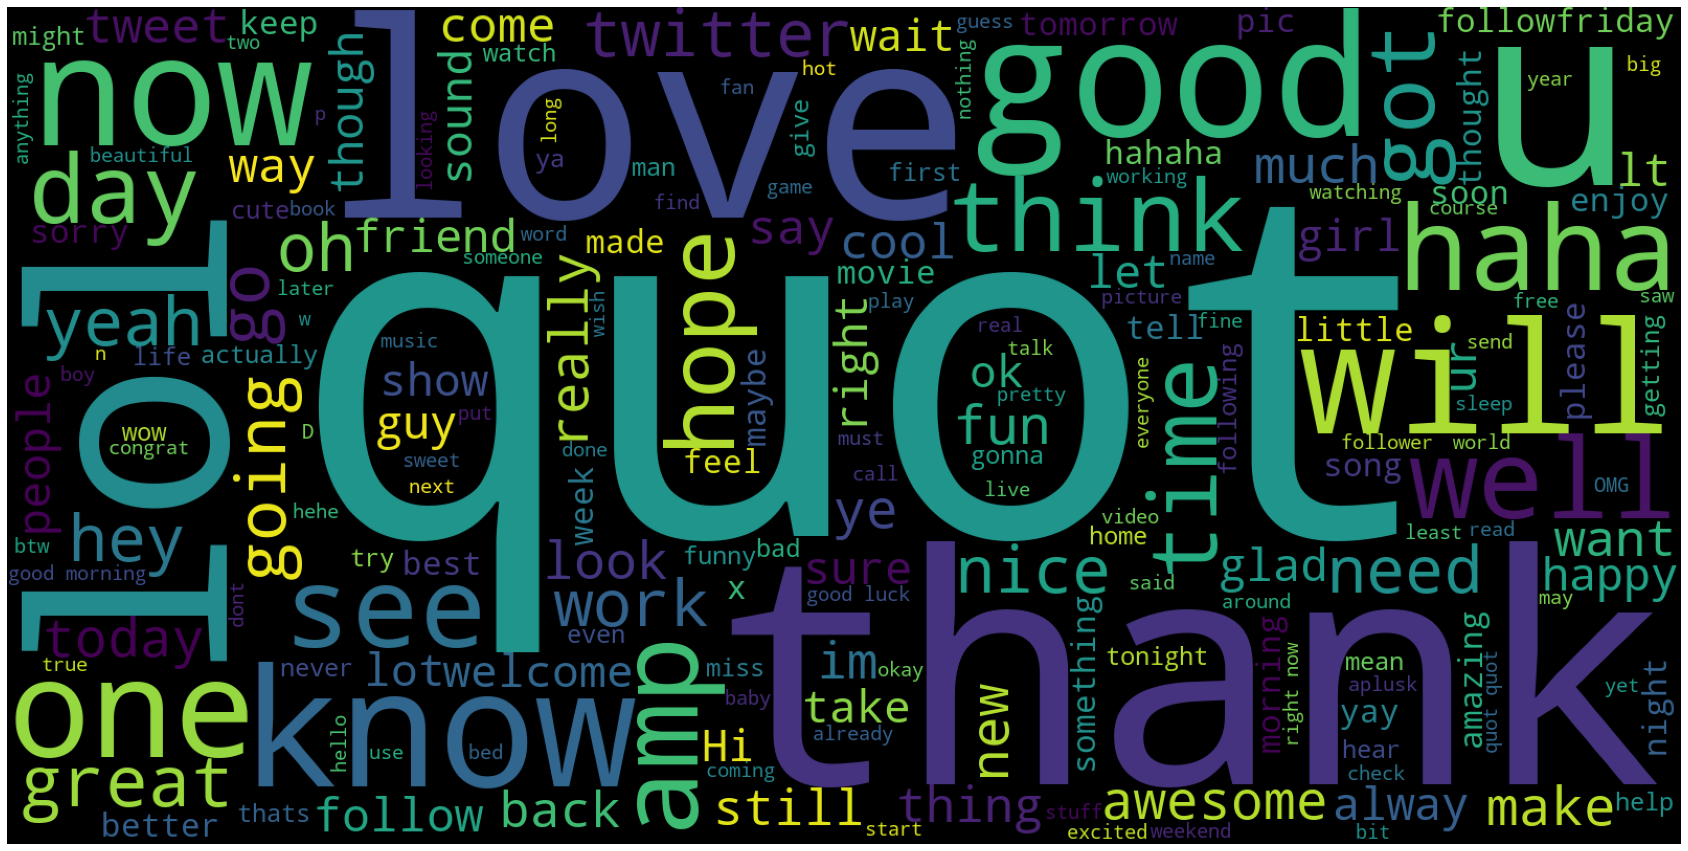

In [16]:
plt.figure(1,figsize=(30,20))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [17]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [18]:
lemmatizer = WordNetLemmatizer()

In [19]:
clean_tweet_lst = []

tweet_len_lst = []

In [20]:
def preprocess(raw):
    # Removing special characters and digits
    letters_only = re.sub("[^a-zA-Z]", " ",raw)
    
    # change sentence to lower case
    letters_only = letters_only.lower()

    # tokenize into words
    words = letters_only.split()
    
    # remove stop words                
    words = [w for w in words if not w in stopwords.words("english")
            if '@' not in w]
    #Lemmatization
    words = [lemmatizer.lemmatize(word) for word in words]
    
    clean_lst.append(" ".join(words))
    
    len_lst.append(len(words))

In [21]:
from tqdm import tqdm, tqdm_notebook

tqdm.pandas()

C:\Users\czees\anaconda3\lib\site-packages\tqdm\std.py:697: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [22]:
clean_lst = []

len_lst = []

df['SentimentText'].progress_apply(preprocess)

df['clean_lema'] = clean_lst

df['length_lema'] = len_lst

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 99989/99989 [12:45<00:00, 130.64it/s]


In [23]:
df.head()

,Sentiment,SentimentText,clean_lema,length_lema
0,0,is so sad for my APL frie...,sad apl friend,3
1,0,I missed the New Moon trail...,missed new moon trailer,4
2,1,omg its already 7:30 :O,omg already,2
3,0,.. Omgaga. Im sooo im gunna CRy. I'...,omgaga im sooo im gunna cry dentist since supo...,13
4,0,i think mi bf is cheating on me!!! ...,think mi bf cheating,4


In [24]:
x=df["clean_lema"]
y=df["Sentiment"]

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer=TfidfVectorizer(min_df=3,max_features=None,strip_accents="unicode",analyzer='word',ngram_range=(1,2),stop_words="english")
x=vectorizer.fit_transform(x)

In [26]:
from imblearn.over_sampling import SMOTE

In [27]:
smote=SMOTE(sampling_strategy='minority')
x,y=smote.fit_resample(x,y)

In [28]:
from sklearn.model_selection  import train_test_split

xtrain, xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=1)

In [29]:
xtrain.shape

(90331, 40518)

In [30]:
y.value_counts()

1    56457
0    56457
Name: Sentiment, dtype: int64

In [31]:
#train_clean=[]
#for i in train['clean_lema']:
#    train_clean.append(i)

#test_clean=[]
#for i in test['clean_lema']:
#    test_clean.append(i)

In [32]:
#BOW
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer=TfidfVectorizer(min_df=3,max_features=None,strip_accents="unicode",analyzer='word',ngram_range=(1,2),stop_words="english")


train_features = (xtrain)

test_features = (xtest)


In [33]:
print("Type of train_features:", type(train_features))

print("Shape of input data", train_features.shape)

Type of train_features: <class 'scipy.sparse.csr.csr_matrix'>
Shape of input data (90331, 40518)


In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report



In [37]:
Classifiers = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    KNeighborsClassifier(),
    RandomForestClassifier(),
    XGBClassifier(),AdaBoostClassifier(),
    GradientBoostingClassifier(),
    XGBClassifier()
    
    
]

In [38]:
for classifier in Classifiers:
    model = classifier.fit(train_features,ytrain)
    pred_test = model.predict(test_features)
    accuracy = accuracy_score(ytest,pred_test)
    print('Accuracy of '+classifier.__class__.__name__+' is '+str(accuracy))
    

C:\Users\czees\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy of LogisticRegression is 0.7607492361510871
Accuracy of DecisionTreeClassifier is 0.7073019527963512
Accuracy of KNeighborsClassifier is 0.5519195855289377
Accuracy of RandomForestClassifier is 0.7537528229198955
[22:42:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\czees\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy of XGBClassifier is 0.7151397068591419
Accuracy of AdaBoostClassifier is 0.6570429083824115
Accuracy of GradientBoostingClassifier is 0.6693973342779967
[22:43:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

C:\Users\czees\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



Accuracy of XGBClassifier is 0.7151397068591419


In [41]:
model =LogisticRegression()
model.fit(train_features,ytrain)
pred_test = model.predict(test_features)
accuracy = accuracy_score(ytest,pred_test)
print("LogisticRegression model accuracy",accuracy)

LogisticRegression model accuracy 0.7607492361510871


C:\Users\czees\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.75      0.78      0.77     11343
           1       0.77      0.74      0.75     11240

    accuracy                           0.76     22583
   macro avg       0.76      0.76      0.76     22583
weighted avg       0.76      0.76      0.76     22583



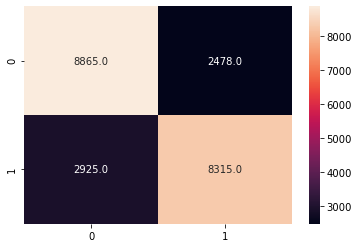

In [42]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
cm=confusion_matrix(ytest,pred_test)
sns.heatmap(cm,annot=True,fmt='.1f')
print(classification_report(ytest,pred_test))

In [ ]:
#estimator
model=LogisticRegression()
#parameter grid
grid=[{"penalty":["l1""l2","elasticnet","none"],
      "C":np.logspace(-4,4,20),
      "solver":["lbfgs","newton-cg","liblinear","sag","saga"],
      "max_iter":[100,1000,2500,5000]
      }
]
#grid Search cv

from sklearn.model_selection import GridSearchCV
grid_cv=GridSearchCV(model,param_grid=grid,cv=2,verbose=True,n_jobs=-1)
res=grid_cv.fit(train_features,ytrain)
print(res.best_score_)
print(res.best_params_)

The hyperparater tuning is taking more time as it has 2400 fits.

Our Logistic Classification model is able to classify the Positive and And Negative Sentiment with 76% accuracy which is good.